In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from preprocessing.scripts.load_and_prepare_all_dish import load_and_prepare_dish
from preprocessing.scripts.load_and_prepare_wine_article import load_and_prepare_wine_articles, change_article_category
from preprocessing.scripts.prepare_for_abc_analys_merge import process_wine_sales
from preprocessing.scripts.add_time_columns_dish import add_time_columns

In [2]:
dish = load_and_prepare_dish('/Users/nl/streamlit_test/data/Отчет по блюдам 1 марта - 23 июня.xlsx')
article = load_and_prepare_wine_articles('/Users/nl/streamlit_test/data/Блюда артикулы.xlsx')

In [3]:
dish.head()

,article,dish,open_time,session_id,order_id,table_no,price,quantity,total_sum,discount,final_sum,payment_type,guest_no
0,949.0,юби юник совиньон блан 150мл,2025-04-10 19:01:00,566.0,6832.0,1.0,580.0,1.0,580.0,0.0,580.0,банковские карты,1.0
1,949.0,юби юник совиньон блан 150мл,2025-04-20 23:32:00,576.0,6964.0,1.0,580.0,1.0,580.0,0.0,580.0,наличные,1.0
2,949.0,юби юник совиньон блан 150мл,2025-04-30 20:47:00,586.0,7117.0,13.0,580.0,1.0,580.0,0.0,580.0,наличные,1.0
3,949.0,юби юник совиньон блан 150мл,2025-05-01 15:33:00,587.0,7132.0,7.0,580.0,1.0,580.0,0.0,580.0,банковские карты,1.0
4,949.0,юби юник совиньон блан 150мл,2025-04-10 19:01:00,566.0,6832.0,1.0,580.0,1.0,580.0,0.0,580.0,банковские карты,1.0


In [4]:
article.head()

,article_category,only_glass_cat,article_name,article,article_price,article_profit,article_profit_percent
33,белые вина,другое,альхайт вайнери хирафте хиа,1616,7900.0,3040.60,38.49
34,белые вина,другое,балаша фурминт токай,1198,3500.0,1058.28,30.24
35,белые вина,другое,бенанти этна бьянко карриканте,1617,6900.0,2648.78,38.39
36,белые вина,другое,бернхард хубер мальтердингер вайс,73,8900.0,5103.70,57.34
37,белые вина,другое,блдега эль порвенир лаборум торронтес,1759,2900.0,1203.80,41.51


In [5]:
article = change_article_category(article)

In [6]:
article.sample(20)

,article_category,only_glass_cat,article_name,article,article_price,article_profit,article_profit_percent
33,белые_вина,белые_вина,альхайт вайнери хирафте хиа,1616,7900.0,3040.60,38.49
137,вина_по_бокалам_150_мл,белые_вина,балаша фурминт токай венгрия 150 мл,1341,700.0,158.74,22.68
309,дижестивы_оранжи,дижестивы_оранжи,пино де шарант шато де монтифо 10 лет,187,550.0,191.22,34.77
40,белые_вина,белые_вина,букенхоутсклуф семильон франшхук юар,1156,10900.0,4272.85,39.20
263,красные_вина,красные_вина,кальтерн кальдаро кальтерерзее классико супери...,2161,3300.0,942.07,28.55
125,вина_вне_карты,вина_вне_карты,йоан ларди ле мишлон,2225,9900.0,4025.02,40.66
109,вина_вне_карты,вина_вне_карты,коллар-пикар премье крю эсансьель миллезим доз...,549,89000.0,38245.55,42.97
307,дижестивы_оранжи,дижестивы_оранжи,узунов вайнери бунт кубань россия,138,3100.0,896.99,28.94
259,красные_вина,красные_вина,жан-морис раффо ле пикасс шинон долина луары ф...,1888,4900.0,1897.50,38.72
249,красные_вина,красные_вина,гагер блауфранкиш рид фабиан,1291,4500.0,1331.29,29.58


In [7]:
df = process_wine_sales(dish, article)

In [8]:
df.sample(20)

,open_time,article_name,price,quantity,final_sum,article_category,only_glass_cat,article_price,article_profit,glass,glass_price,glass_profit
762,2025-04-17 18:21:00,бодега атамиск катальпа мальбек мендоса аргентина,4500.0,1.0,900.0,красные_вина,красные_вина,4500.0,1197.77,бокал,900.0,239.554
870,NaT,шато фелан сегюр сент-эстеф франция,0.0,0.0,0.0,красные_вина,красные_вина,18900.0,5099.15,бутылка,18900.0,5099.150
366,2025-05-30 22:49:00,кальтерн кальдаро кей уайт трентино-альто адид...,580.0,2.0,1160.0,вина_по_бокалам_150_мл,белые_вина,660.0,161.82,бокал,660.0,161.820
825,2025-02-28 23:08:00,мюзелла амароне делла вальполичелла резерва ве...,13900.0,1.0,13900.0,красные_вина,красные_вина,13900.0,3974.75,бутылка,13900.0,3974.750
624,2025-06-15 14:28:00,узунов розе экстра брют кубань россия,2100.0,1.0,0.0,игристые,игристые,3100.0,1104.00,бутылка,3100.0,1104.000
580,NaT,санчес ромате нпу амонтильядо херес испания,0.0,0.0,0.0,дижестивы_оранжи,дижестивы_оранжи,7500.0,2982.26,бутылка,7500.0,2982.260
373,2025-04-26 17:52:00,кальтерн кальдаро кей уайт трентино-альто адид...,580.0,2.0,1160.0,вина_по_бокалам_150_мл,белые_вина,660.0,161.82,бокал,660.0,161.820
111,2025-04-11 16:42:00,лез эритье дю комт лафон вире клессе,13900.0,1.0,13900.0,белые_вина,белые_вина,13900.0,5844.30,бутылка,13900.0,5844.300
187,NaT,шато де ля рулери шенен блан аос анжу блан,0.0,0.0,0.0,белые_вина,белые_вина,5900.0,2098.75,бутылка,5900.0,2098.750
917,2025-04-23 20:57:00,усадьба дивноморское ребо кубань россия,7500.0,1.0,1500.0,красные_вина,красные_вина,12900.0,3984.75,бокал,2580.0,796.950


In [9]:
df.article_category.unique()

array(['белые_вина', 'вина_вне_карты', 'вина_по_бокалам_150_мл',
       'дижестивы_оранжи', 'игристые', 'красные_вина'], dtype=object)

In [13]:
df.only_glass_cat.unique()

array(['белые_вина', 'вина_вне_карты', 'дижестивы_оранжи', 'игристые',
       'красные_вина'], dtype=object)

In [ ]:
data = df[(df.glass == 'вина_по_бокалам_150_мл')]

In [14]:
data = data[data.open_time.notna()]

In [29]:
data.groupby('only_glass_cat')['glass_price'].agg('sum')

only_glass_cat
белые_вина          92000.0
дижестивы_оранжи    66620.0
игристые            41170.0
красные_вина        46840.0
Name: glass_price, dtype: float64

In [13]:
data.groupby('only_glass_cat')['final_sum'].agg('sum')

only_glass_cat
белые_вина          112489.0
дижестивы_оранжи     84594.0
игристые             58252.0
красные_вина         37970.0
Name: final_sum, dtype: float64

In [33]:
data = add_time_columns(data)

In [34]:
data

,open_time,article_name,price,quantity,final_sum,article_category,only_glass_cat,article_price,article_profit,glass,glass_price,glass_profit,month,day,hour,month_year
284,2025-04-08 19:44:00,балаша фурминт токай венгрия 150 мл,620.0,1.0,620.0,вина_по_бокалам_150_мл,белые_вина,700.0,158.74,бокал,700.0,158.74,April,Tuesday,19,2025-04
285,2025-04-26 17:52:00,балаша фурминт токай венгрия 150 мл,620.0,1.0,620.0,вина_по_бокалам_150_мл,белые_вина,700.0,158.74,бокал,700.0,158.74,April,Saturday,17,2025-04
286,2025-04-11 18:51:00,балаша фурминт токай венгрия 150 мл,620.0,1.0,620.0,вина_по_бокалам_150_мл,белые_вина,700.0,158.74,бокал,700.0,158.74,April,Friday,18,2025-04
287,2025-04-26 19:05:00,балаша фурминт токай венгрия 150 мл,620.0,2.0,1240.0,вина_по_бокалам_150_мл,белые_вина,700.0,158.74,бокал,700.0,158.74,April,Saturday,19,2025-04
288,2025-05-06 19:12:00,балаша фурминт токай венгрия 150 мл,620.0,1.0,620.0,вина_по_бокалам_150_мл,белые_вина,700.0,158.74,бокал,700.0,158.74,May,Tuesday,19,2025-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2025-06-20 13:05:00,рейнеке сира стелленбош юар 150 мл,820.0,1.0,820.0,вина_по_бокалам_150_мл,красные_вина,1100.0,432.18,бокал,1100.0,432.18,June,Friday,13,2025-06
557,2025-05-14 20:10:00,рейнеке сира стелленбош юар 150 мл,820.0,1.0,820.0,вина_по_бокалам_150_мл,красные_вина,1100.0,432.18,бокал,1100.0,432.18,May,Wednesday,20,2025-05
558,2025-06-12 20:07:00,солнечная долина меганом резерв кубань россия ...,580.0,1.0,580.0,вина_по_бокалам_150_мл,красные_вина,580.0,178.72,бокал,580.0,178.72,June,Thursday,20,2025-06
559,2025-06-11 21:17:00,солнечная долина меганом резерв кубань россия ...,580.0,1.0,580.0,вина_по_бокалам_150_мл,красные_вина,580.0,178.72,бокал,580.0,178.72,June,Wednesday,21,2025-06


In [41]:
data.groupby(['only_glass_cat', 'month'], as_index=False)['final_sum'].agg('sum')

,only_glass_cat,month,final_sum
0,белые_вина,April,33020.0
1,белые_вина,June,38409.0
2,белые_вина,March,16880.0
3,белые_вина,May,24180.0
4,дижестивы_оранжи,April,15740.0
5,дижестивы_оранжи,June,22300.0
6,дижестивы_оранжи,March,24304.0
7,дижестивы_оранжи,May,22250.0
8,игристые,April,3180.0
9,игристые,June,42352.0


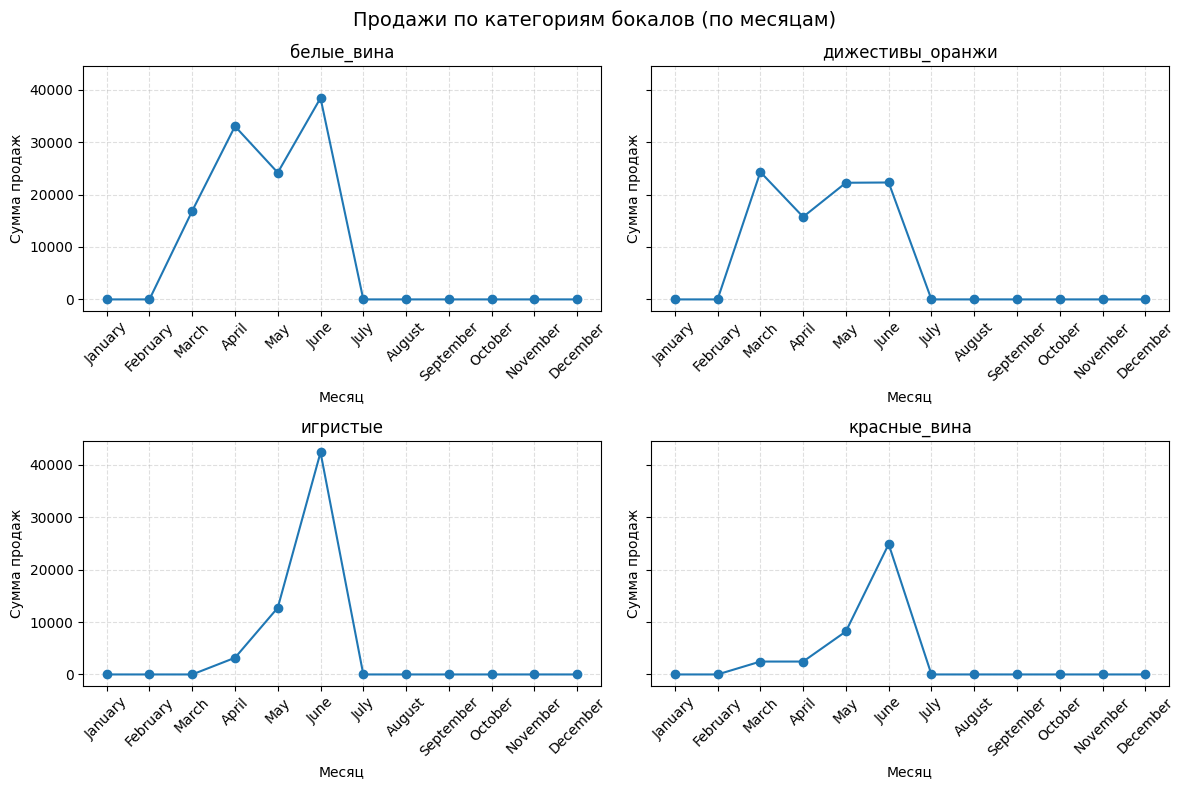

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from calendar import month_name

# 1) Готовим данные: сумма по категориям × месяцам
# Если у тебя уже есть такой groupby — можно начать с него.
grp = (
    data.groupby(['only_glass_cat', 'month'], as_index=False)['final_sum']
        .sum()
)

# 2) Делаем порядок месяцев календарным
# (если 'month' у тебя уже datetime/Period — замени на .dt.month_name())
all_months = [m for m in month_name if m]  # ['January', 'February', ... 'December']
cat_type = pd.api.types.CategoricalDtype(categories=all_months, ordered=True)
grp['month'] = grp['month'].astype(cat_type)

# 3) Список нужных категорий (4 штуки)
cats = ['белые_вина', 'дижестивы_оранжи', 'игристые', 'красные_вина']

# 4) Рисуем 2×2 субплота
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.ravel()

for i, cat in enumerate(cats):
    ax = axes[i]
    # данные по категории; реиндекс по всем месяцам, чтобы отсутствующие были 0
    dfc = (
        grp.loc[grp['only_glass_cat'] == cat, ['month', 'final_sum']]
           .set_index('month')
           .reindex(all_months)              # календарный порядок
           .fillna(0.0)
           .reset_index()
           .rename(columns={'index': 'month'})
    )

    # Линейный график (можно заменить на bar — закомментированный код ниже)
    ax.plot(dfc['month'].astype(str), dfc['final_sum'], marker='o')
    # ax.bar(dfc['month'].astype(str), dfc['final_sum'])  # <- если хочешь столбики

    ax.set_title(cat)
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Сумма продаж')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.tick_params(axis='x', rotation=45)

# Если категорий меньше 4 — уберём лишние оси
for j in range(len(cats), 4):
    fig.delaxes(axes[j])

fig.suptitle('Продажи по категориям бокалов (по месяцам)', fontsize=14, y=0.98)
fig.tight_layout()
plt.show()
